# Supervised Learning using Regression


# Goal:
Predicting Continuous Target Variables With Regresssion Analysis
- Dataset: Housing value dataset
- Source: UC irevin
- https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

Read the dataset from the url into a data frame.
Display the first few rows of the data frame to make sure the data was read properly

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Exploratory Data Analysis 
Visualize the important characteristics of the dataset before attempting to build a regression model 
(Exploratory Data Analysis - EDA - is a recommended first step prior to the training of a machine learning model.
 We will create a scatterplot matrix that allows us to visualize the pair-wise correlations between different features
 in the dataset in one place.

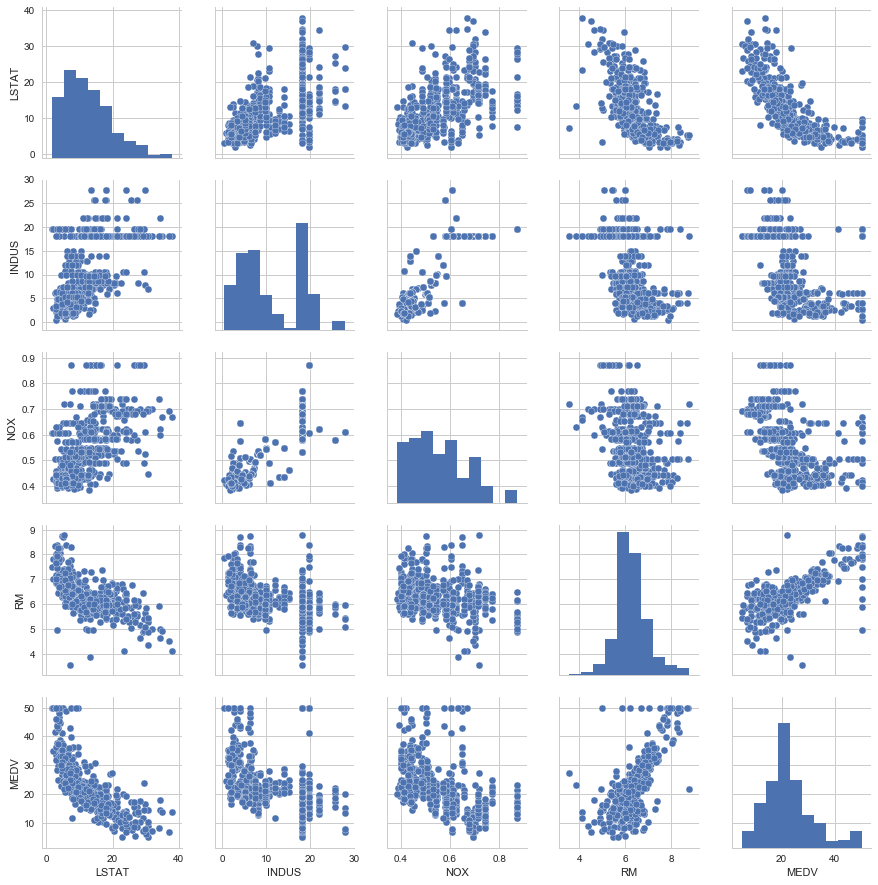

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

Create a correlation matrix to quantify the linear relationships between features.

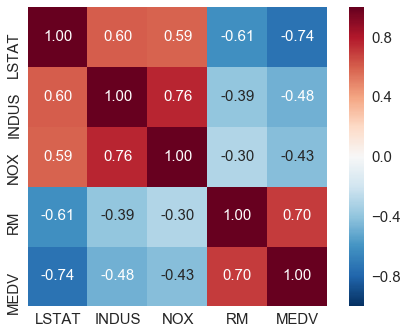

In [3]:
import numpy as np
cor_matrix = np.corrcoef(df[cols].values.T) # note we transpose to get the data by columns. COlumns become rows.
sns.set(font_scale=1.5)
cor_heat_map = sns.heatmap(cor_matrix,
cbar=True,
annot=True,
square=True,
fmt='.2f',
annot_kws={'size':15},
yticklabels=cols,
xticklabels=cols)
plt.show()

Separate the independent and dependent variables into two variables X and Y and also standardize the data

In [4]:
X = df[['RM']].values 
# note how we can pass a list of columns (here just a single-item list) to access data in df
y = df[['MEDV']].values 
#you either have to define this list of columns separately or inline like here, where you get the [[ ...]]
#print(df[['MEDV']].head())
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [5]:
# let's see how sklearn does the scaling
print('original data\n', y[0:4])
print('scaled data using sklearn StandardScaler\n', y_std[0:5])

original data
 [[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]]
scaled data using sklearn StandardScaler
 [[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]]


In [7]:
#let's do the same computation manually
print('average of original data', np.average(y[:]))
print('STDV of original data', np.std(y[:]))
z_scores = (y[:] - np.average(y[:])) / np.std(y[:])
print('Manually computed Z scores:\n', z_scores[0:5])

average of original data 22.5328063241
STDV of original data 9.18801154528
Manually computed Z scores:
 [[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]]


### Build the linear regression model

In [8]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
# first, let's fit the un-standardized data
slr.fit(X,y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [9]:
# now, let's try with standardized data
slr_std = LinearRegression()
slr_std.fit(X_std,y_std)
print('Slope: %.3f' % slr_std.coef_[0])
print('Intercept: %.3f' % slr_std.intercept_)

Slope: 0.695
Intercept: -0.000


let's make a prediction using both models (the model using standardized data and the model using un-standardized data)

In [10]:
# predict the price of a 5 bedroom house
import numpy as np
num_rooms = [5.0]
num_rooms_std = sc_x.transform(np.array(num_rooms).reshape(len(num_rooms),1)) # note transform expects a 2D array
print('standardized rooms: %.3f', num_rooms_std)
predicted_price_std = slr_std.predict(num_rooms_std)
print('Predicted Price std: %.3f' % predicted_price_std)
print("Predicted Price in $1000's using standardized data: %.3f" % sc_y.inverse_transform(predicted_price_std) )

standardized rooms: %.3f [[-1.83016553]]
Predicted Price std: -1.273
Predicted Price in $1000's using standardized data: 10.840


Now let's predict using the model that uses un-standardized data

In [11]:
predicted_price_non_std = slr.predict(np.array(num_rooms).reshape(len(num_rooms),1))
print("Predicted Price in $1000's Using un-standardized data: %.3f" % predicted_price_non_std)

Predicted Price in $1000's Using un-standardized data: 10.840


- Visualize how well the linear regression line fits the data
- plot a scatterplot of the training data
- add the regression line

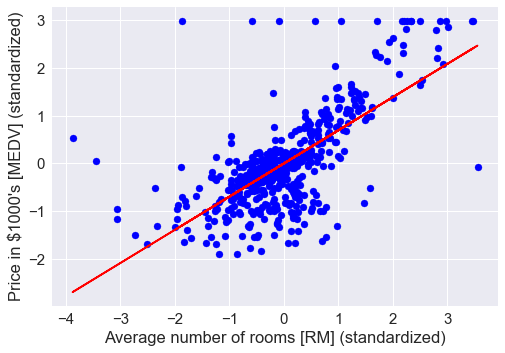

In [12]:
plt.scatter(X_std,y_std, c='blue')
plt.plot(X_std,slr_std.predict(X_std), color='red')
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

now visualize the original, un-standardized training data and regression line

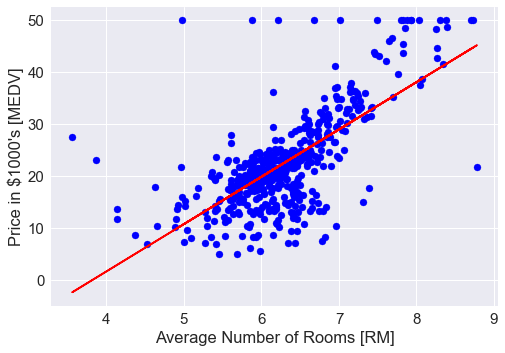

In [13]:
plt.scatter(X,y, color='blue')
plt.plot(X, slr.predict(X), color='red')
plt.xlabel('Average Number of Rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

evaluate the performance of the regresion model on training data

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
# first let's focus on original un-standardized data and model
MSE1 = mean_squared_error(y_true= y, y_pred= slr.predict(X))
r2_1 = r2_score(y_true= y, y_pred= slr.predict(X))
print('MSE for regression model using un-standrdized features: %.3f' % MSE1)
print('RMSE:', np.sqrt(MSE1))
print('r2:', r2_1)
print('_____________________________________________________')

MSE for regression model using un-standrdized features: 43.601
RMSE: 6.60307138922
r2: 0.483525455991
_____________________________________________________


now let's do the same thing for standardized data and regression model

In [17]:
MSE_2 = mean_squared_error(y_true= y_std, y_pred=slr_std.predict(X_std) )
print('MSE for standardized data:', MSE_2)
y_true_converted_to_originl = sc_y.inverse_transform(y_std)
y_pred_converted_to_original = sc_y.inverse_transform(slr_std.predict(X_std))
MSE2 = mean_squared_error(y_true= y_true_converted_to_originl, y_pred= y_pred_converted_to_original)
r2_2 = r2_score(y_true= y_std, y_pred= slr_std.predict(X_std))
r2_2_using_data_converted_to_original_scale = r2_score(y_true= y_true_converted_to_originl, y_pred= y_pred_converted_to_original)
print('MSE using standardized features converted to original scale: %.3f' % MSE2)
print('RMSE:', np.sqrt(MSE2))
print('r2 using standardized data and model:',r2_2)
print('r2 using data converted to original scale', r2_2_using_data_converted_to_original_scale)

MSE for standardized data: 0.516474544009
MSE using standardized features converted to original scale: 43.601
RMSE: 6.60307138922
r2 using standardized data and model: 0.483525455991
r2 using data converted to original scale 0.483525455991


- So far we have built a simple regression model. Let's build a multiple regression model that uses all the variables
- We also want to test the multiple regressin model using data that is not used for training to get an unbiased estimate of its performance

In [19]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values # notice we access the column data by passing the column string name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

C:\Users\pranj\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Since our model is using multiple explanatory variables we can't visualize the linear regression line (or the hyperplane) in a two-dimensional plot,but we can plot the residuals (the differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model. We can use the residual plot to detect problems like nonlinearity, outliers, and to check if the errors are randomly distributed.

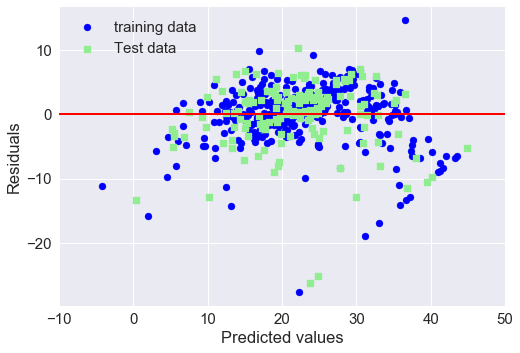

In [22]:
plt.scatter(y_train_pred,y_train_pred - y_train, c= 'blue', marker='o', label='training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c= 'lightgreen', marker='s', label= 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10,50])
plt.show()

- Notice the outlier - the points with a large deviation from the centerline
- Notice the pattern in residuals, which means our model is unable to capture some explanatory variable

 - now we compute a quantitative measure of the performance of the regression model
 - we compute MSE, which is the average of SSE cost function that we optimize to get the regression model
 - MSE is useful for comparing different regression model or tuning their parameters

In [25]:
print('MSE training: %.3f, test: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))

MSE training: 19.958, test: 27.196


- notic that MSE on training is larger comapred to traing so our model is overfitting the training data
- now we compute the coefficient of determination R2, which is a standardized version of MSE
- R2 is computed as ( 1 - SSE/SST) where SST is the variance of the response variable.
- R2 is the fraction of the response variance that is captured by the model.

In [26]:
print('R^2 training: %.3f, test: %.3f' % (
r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred)))

R^2 training: 0.765, test: 0.673


One way to tackle the overfitting problem is to use regularization. Let's try Ridge Regression, Least Absolute Shrinkage and Selection Operator (LASSO) Regression, and Elastic Net Regressionmethods

In [27]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_regressor = Ridge(alpha=1.0)
lasso_regressor = Lasso(alpha=1.0)
elastic_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)
ridge_regressor.fit(X_train, y_train)
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

In [28]:
print('MSE training Ridge: %.3f, test: %.3f' %
(mean_squared_error(y_train, y_train_pred_ridge),
mean_squared_error(y_test, y_test_pred_ridge)))
print('R^2 training Ridge: %.3f, test: %.3f' % (
r2_score(y_train, y_train_pred_ridge),
r2_score(y_test, y_test_pred_ridge)))

MSE training Ridge: 20.145, test: 27.762
R^2 training Ridge: 0.762, test: 0.667


In [29]:
lasso_regressor.fit(X_train, y_train)
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)
print('MSE training Lasso: %.3f, test: %.3f' %
(mean_squared_error(y_train, y_train_pred_lasso),
mean_squared_error(y_test, y_test_pred_lasso)))
print('R^2 training Lasso: %.3f, test: %.3f' % (
r2_score(y_train, y_train_pred_lasso),
r2_score(y_test, y_test_pred_lasso)))

MSE training Lasso: 24.717, test: 32.345
R^2 training Lasso: 0.708, test: 0.612


In [30]:
elastic_regressor.fit(X_train, y_train)
y_train_pred_elastic = elastic_regressor.predict(X_train)
y_test_pred_elastic = elastic_regressor.predict(X_test)
print('MSE train elastic: %.3f, test: %.3f' %
(mean_squared_error(y_train, y_train_pred_elastic),
mean_squared_error(y_test, y_test_pred_elastic)))
print('R^2 train elastic: %.3f, test: %.3f' % (
r2_score(y_train, y_train_pred_elastic),
r2_score(y_test, y_test_pred_elastic)))

MSE train elastic: 24.381, test: 31.874
R^2 train elastic: 0.712, test: 0.617


Now let's do a Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
criterion='mse',
random_state=1,
n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE training: %.3f, test: %.3f' % (
mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))
print('R2 training: %.3f, test: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))
print('feature importances: ', forest.feature_importances_)

MSE training: 1.409, test: 14.354
R2 training: 0.983, test: 0.828
feature importances:  [ 0.03646835  0.00147287  0.00815337  0.00174486  0.01611471  0.44747402
  0.01272985  0.03728278  0.00418061  0.0167017   0.02260298  0.01103352
  0.38404037]


Notice that the random forest model overfits the training data, but it is still able to explain the relationship between the traget and explanatory variables relatively well on the test data set (R= 0.871).

Let's take a look at the residuals of the prediction

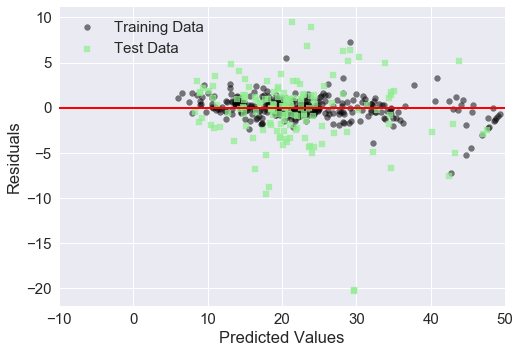

In [33]:
plt.scatter(y_train_pred,y_train_pred - y_train,
c='black', marker='o',
s=35, alpha=0.5, label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test,
c='lightgreen', marker='s',
s=35,alpha=0.7, label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10, xmax=50,lw=2, color='red')
plt.xlim([-10,50])
plt.show()


Note: Three possible approaches to model nonlinear relationships include (1) polynomial feature transformation, (2) random forest regressors, and (3) transforming non-linear data into linear data using, for example, log and sqrt transformations. Note that Random forest regressor will not give you
the coefficients of the regression model beacuse there is no single global line. Instead we have a large number of piecewise lines, one for each tree.

In [35]:
from sklearn.cross_validation import cross_val_score
mse_scores = cross_val_score(forest, X_train,y_train, scoring='mean_squared_error',cv=10)
print('cross validated MSE for random forest regressor:', mse_scores)
print('Mean cross validated MSE',np.mean(mse_scores))
print('STDV for cross validated MSE',np.std(mse_scores))
r2_scores = cross_val_score(forest, X_train,y_train, scoring='r2',cv=10)
print('cross validated R2 for random forest regressor:', r2_scores)
print('Mean cross validated R2:',np.mean(r2_scores))
print('STDV for cross validated R2:', np.std(r2_scores) )


C:\Users\pranj\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pranj\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pranj\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pranj\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\pranj\Anaconda3\lib\site-pa

cross validated MSE for random forest regressor: [ -4.19598361  -5.89813544 -23.554687    -5.96051112  -8.48541521
 -27.89186038 -38.30750076 -11.01270146 -12.24943445  -5.76512529]
Mean cross validated MSE -14.3321354714
STDV for cross validated MSE 11.0028716675
cross validated R2 for random forest regressor: [ 0.89741746  0.93961633  0.58977173  0.89567192  0.92121269  0.53917238
  0.66932404  0.91672574  0.88803085  0.9013398 ]
Mean cross validated R2: 0.815828294584
STDV for cross validated R2: 0.145351445509


Notice that cross validated mse scores are reported as negative numbers in sklearn.